In [183]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt 
import rasterio
from matplotlib.patches import Rectangle
from shapely.geometry import box, Point
import os

In [184]:
df_1=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\lat_lon_label_3_points.csv")
df_2=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\lat_lon_label_4_points.csv")

In [185]:
tif_paths=[
    r"C:\Users\rishi\ml_projects\climate\500_18\CO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\HCHO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\NO2\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\O3\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\SO2\response.tiff",
]

In [186]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
#gdf.plot()

In [187]:
gdf_points_peri = gpd.GeoDataFrame(
    df_1, 
    geometry=gpd.points_from_xy(df_1['LON'], df_1['LAT']),
    crs="EPSG:4326"  # Set the coordinate reference system (WGS84)
)

In [188]:
gdf_points_urban = gpd.GeoDataFrame(
    df_2, 
    geometry=gpd.points_from_xy(df_2['LON'], df_2['LAT']),
    crs="EPSG:4326"  # Set the coordinate reference system (WGS84)
)

In [189]:
o_path_1=r"C:\Users\rishi\ml_projects\climate\500_18\O3\response.tiff"
o_path_2=r"C:\Users\rishi\ml_projects\climate\500_23\O3\response.tiff"
o_map=[]
def get_min_max(tiff_path):
    with rasterio.open(tiff_path) as src:
        raster_data = src.read(1)
        vmin, vmax = np.nanmin(raster_data), np.nanmax(raster_data)
    return vmin, vmax

# Get min and max from both TIFFs
vmin1, vmax1 = get_min_max(o_path_1)
vmin2, vmax2 = get_min_max(o_path_2)

# Calculate global min and max
omap = (min(vmin1, vmin2), max(vmax1, vmax2))

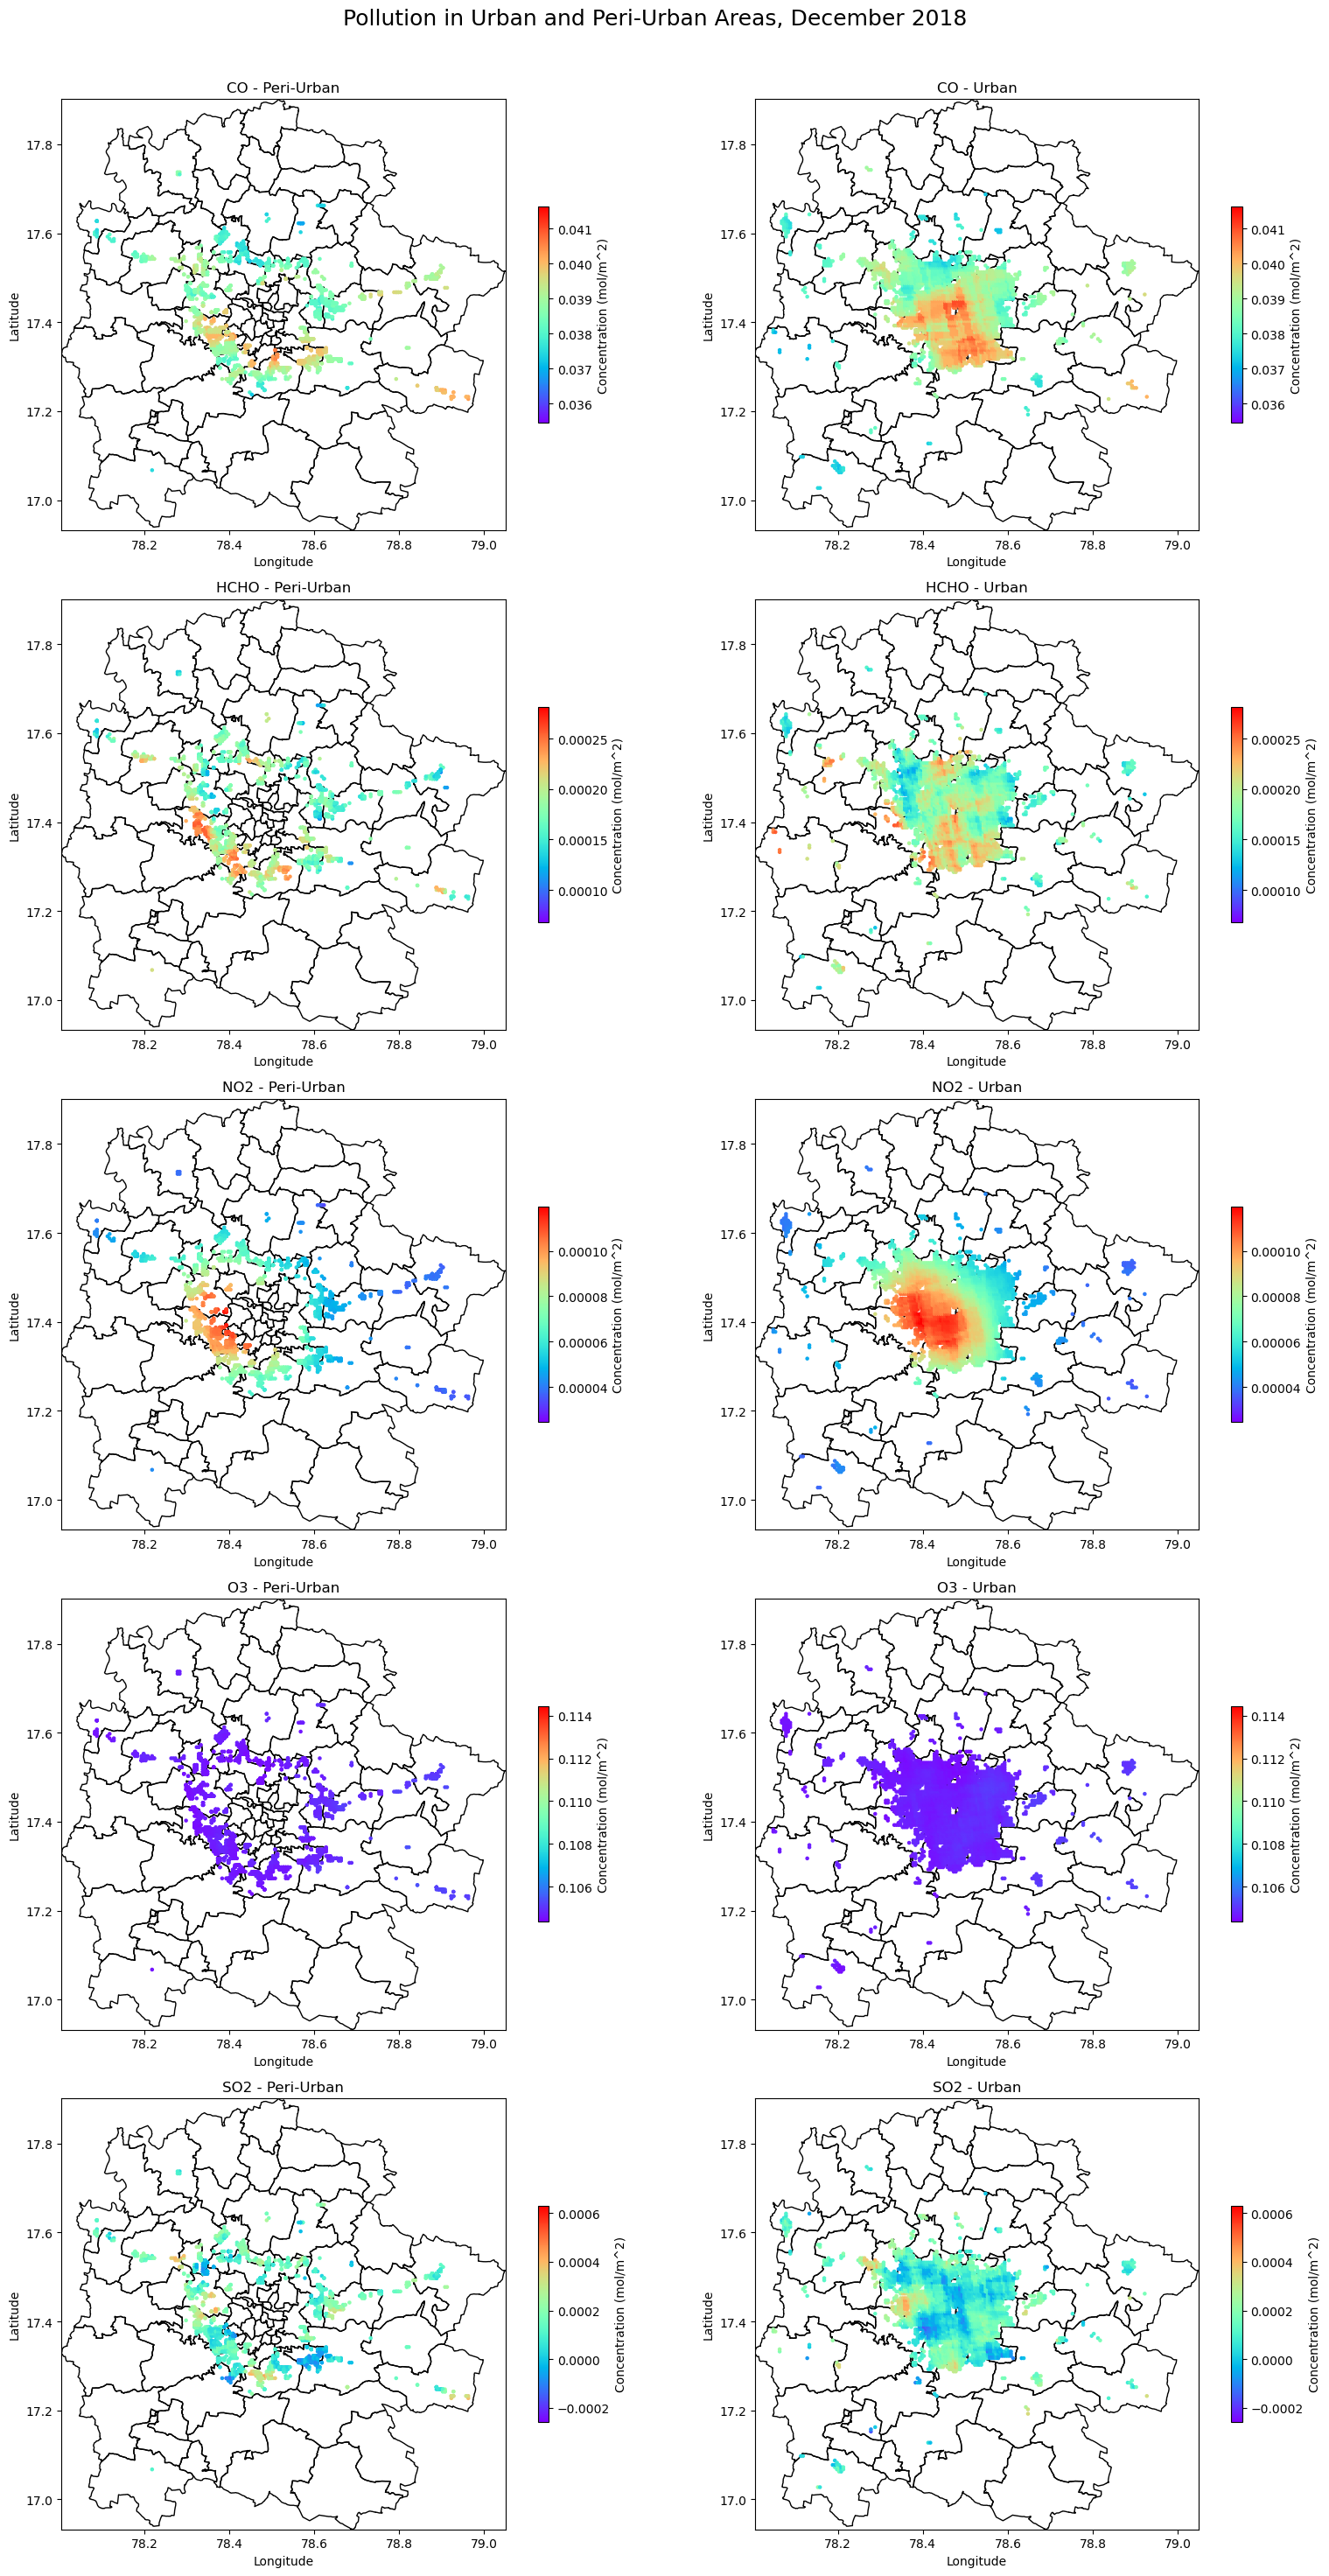

In [190]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'

# Load the shapefile and GeoDataFrames
shape_data = gpd.read_file(shapefile_path)
gdf_peri = gdf_points_peri  # Peri-urban points
gdf_urban = gdf_points_urban  # Urban points

# Create a figure with 15 subplots (5 TIFFs * 3 views)
fig, axes = plt.subplots(5, 2, figsize=(16, 30))  # 5 rows, 3 columns
fig.suptitle('Pollution in Urban and Peri-Urban Areas, December 2018', fontsize=18)

cmap_scales = []

# Iterate over TIFF files and create three plots for each
for i, tif_path in enumerate(tif_paths):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        raster_data = src.read(1)
        bounds = src.bounds
        vmin, vmax = np.nanmin(raster_data), np.nanmax(raster_data)  # Scale
        cmap_scales.append((vmin, vmax))

        def extract_raster_value(gdf, src):
            return gdf['geometry'].apply(
                lambda point: (
                    raster_data[src.index(point.x, point.y)]
                    if 0 <= point.x < src.width and 0 <= point.y < src.height
                    else np.nan
                )
            )

        # Extract raster values for both GeoDataFrames
        gdf_peri['raster_value'] = extract_raster_value(gdf_peri, src)
        gdf_urban['raster_value'] = extract_raster_value(gdf_urban, src)
    m = tif_path.split(os.sep)
    if(i==3):
        vmin,vmax=omap
    # Plot 1: Peri-urban points
    ax = axes[i, 0]
    shape_data.plot(ax=ax, color='none', edgecolor='black')
    gdf_peri.plot(ax=ax, column='raster_value', cmap='rainbow', markersize=5, legend=True,
                  legend_kwds={'shrink': 0.5, 'label': "Concentration (mol/m^2)"}, vmin=vmin, vmax=vmax)
    ax.set_xlim(bounds.left, bounds.right)
    ax.set_ylim(bounds.bottom, bounds.top)
    ax.set_title(f'{m[6]} - Peri-Urban')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Plot 2: Urban points
    ax = axes[i, 1]
    shape_data.plot(ax=ax, color='none', edgecolor='black')
    gdf_urban.plot(ax=ax, column='raster_value', cmap='rainbow', markersize=5, legend=True,
                   legend_kwds={'shrink': 0.5,'label': "Concentration (mol/m^2)"}, vmin=vmin, vmax=vmax)
    ax.set_xlim(bounds.left, bounds.right)
    ax.set_ylim(bounds.bottom, bounds.top)
    ax.set_title(f'{m[6]} - Urban')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [191]:
tif_paths=[
    r"C:\Users\rishi\ml_projects\climate\500_23\CO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\HCHO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\NO2\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\O3\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\SO2\response.tiff"
]

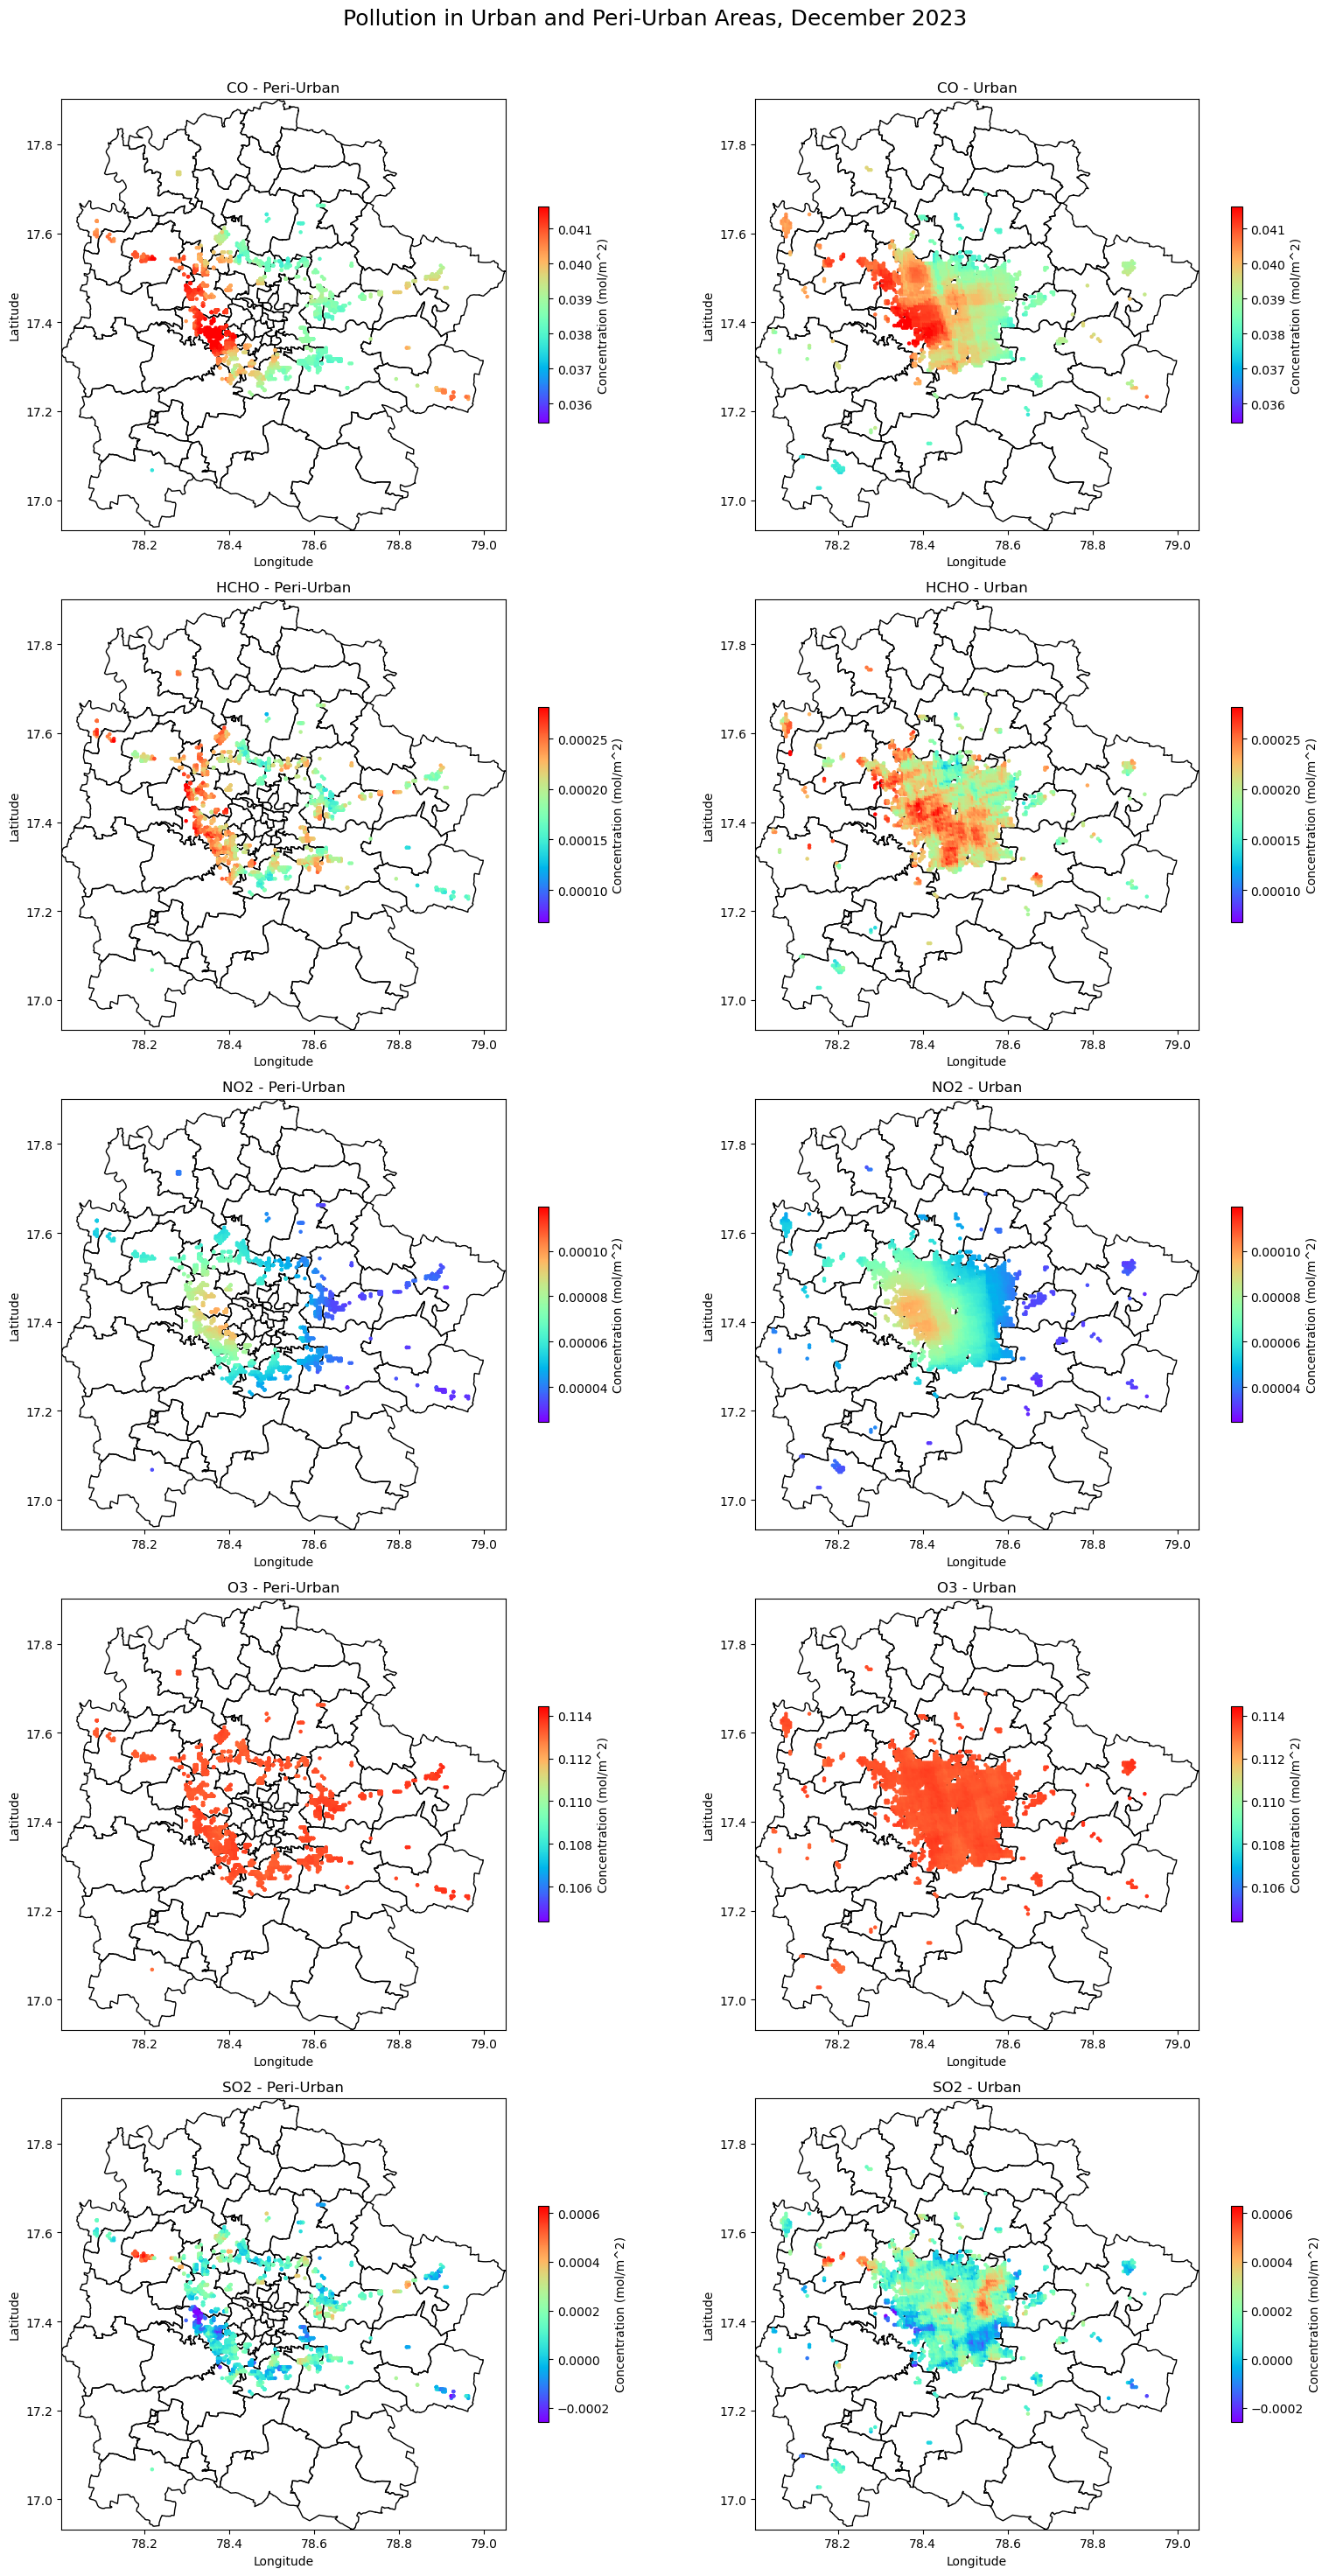

In [192]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'

# Load the shapefile and GeoDataFrames
shape_data = gpd.read_file(shapefile_path)
gdf_peri = gdf_points_peri  # Peri-urban points
gdf_urban = gdf_points_urban  # Urban points

# Create a figure with 15 subplots (5 TIFFs * 3 views)
fig, axes = plt.subplots(5, 2, figsize=(16, 30))  # 5 rows, 3 columns
fig.suptitle('Pollution in Urban and Peri-Urban Areas, December 2023', fontsize=18)

# Iterate over TIFF files and create three plots for each
for i, tif_path in enumerate(tif_paths):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        raster_data = src.read(1)
        bounds = src.bounds
        vmin, vmax = np.nanmin(raster_data), np.nanmax(raster_data)  # Scale

        def extract_raster_value(gdf, src):
            return gdf['geometry'].apply(
                lambda point: (
                    raster_data[src.index(point.x, point.y)]
                    if 0 <= point.x < src.width and 0 <= point.y < src.height
                    else np.nan
                )
            )

        # Extract raster values for both GeoDataFrames
        gdf_peri['raster_value'] = extract_raster_value(gdf_peri, src)
        gdf_urban['raster_value'] = extract_raster_value(gdf_urban, src)
    m = tif_path.split(os.sep)
    # Plot 1: Peri-urban points

    vmin,vmax=cmap_scales[i]
    if(i==3):
        vmin,vmax=omap
    ax = axes[i, 0]
    shape_data.plot(ax=ax, color='none', edgecolor='black')
    gdf_peri.plot(ax=ax, column='raster_value', cmap='rainbow', markersize=5, legend=True,
                  legend_kwds={'shrink': 0.5,'label': "Concentration (mol/m^2)"}, vmin=vmin, vmax=vmax)
    ax.set_xlim(bounds.left, bounds.right)
    ax.set_ylim(bounds.bottom, bounds.top)
    ax.set_title(f'{m[6]} - Peri-Urban')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Plot 2: Urban points
    ax = axes[i, 1]
    shape_data.plot(ax=ax, color='none', edgecolor='black')
    gdf_urban.plot(ax=ax, column='raster_value', cmap='rainbow', markersize=5, legend=True,
                   legend_kwds={'shrink': 0.5,'label': "Concentration (mol/m^2)"}, vmin=vmin, vmax=vmax)
    ax.set_xlim(bounds.left, bounds.right)
    ax.set_ylim(bounds.bottom, bounds.top)
    ax.set_title(f'{m[6]} - Urban')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
